<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab Week 3

## Introduction:
In this lab, we'll explore both multivariate Gaussians and mixture models.

Mixture models are a powerful way to combine simple distributions to create complex distributions. Gaussian mixture modeling is a common place to start, because of the attractive theoretical properties of the model.

---
## Exercise #1: Data Generation
First, we'll practice sampling from a mixture model.

In [13]:
import numpy as np

def sample_mm( Mu, Sigma, Weight ):
    # Mu is a list of length k. Each entry in the list is a dx1 vector, representing the mean of the corresponding mixture component
    # Sigma is a list of length k. Each entry is a dxd matrix, representing the corresponding covariance matrix
    # Weight is a list of length k. Each entry is a 1x1 scalar, representing the prior probability of that component
    #
    # Your code should return a single sample from the mixture. It should be a dx1 vector.

    # NOTE: the only sampling functions you can use are np.random.randn and np.random.choice (don't use np.random.multivariate_normal)
    # you can use other math functions as needed
    # HINT: Look at section 7.6.3 of the book for a way to sample from a Multivariate Gaussian

    # your code here
    k=len(Mu)
    component_idx = np.random.choice(k, p=Weight)
    mu = Mu[component_idx]
    sigma = Sigma[component_idx]
    L = np.linalg.cholesky(sigma)
    d = mu.shape[0]
    z = np.random.randn(d, 1)
    x = mu + L.dot(z)
    return x




In [14]:
# our mixture model

mu_1 = np.array([[0.22], [0.45]])
mu_2 = np.array([[0.5], [0.5]])
mu_3 = np.array([[0.77], [0.55]])
Mu = np.array([mu_1, mu_2, mu_3])

Sigma1 = np.array([[0.011, -0.01], [-0.01, 0.018]])
Sigma2 = np.array([[0.018, 0.01], [0.01, 0.011]])
Sigma3 = Sigma1
Sigma = np.array([Sigma1, Sigma2, Sigma3])

Weight = np.array([0.3, 0.4, 0.3])

### Now, visualize the results and compare to the expected shapes
Here is some simple code for visualizing the level sets of a Gaussian

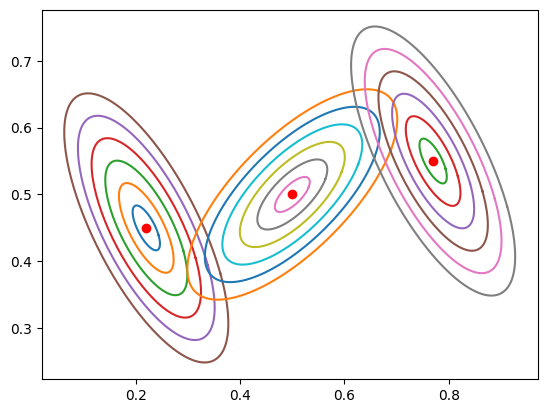

In [15]:
import matplotlib.pyplot as plt
from scipy import linalg

def sigmaEllipse2D(mu, Sigma, level=3, npoints=128):
    """
    SIGMAELLIPSE2D generates x,y-points which lie on the ellipse describing
    a sigma level in the Gaussian density defined by mean and covariance.

    Input:
        MU          [2 x 1] Mean of the Gaussian density
        SIGMA       [2 x 2] Covariance matrix of the Gaussian density
        LEVEL       Which sigma level curve to plot. Can take any positive value,
                    but common choices are 1, 2 or 3. Default = 3.
        NPOINTS     Number of points on the ellipse to generate. Default = 32.

    Output:
        XY          [2 x npoints] matrix. First row holds x-coordinates, second
                    row holds the y-coordinates. First and last columns should
                    be the same point, to create a closed curve.
    """
    phi = np.linspace(0, 2 * np.pi, npoints)
    x = np.cos(phi)
    y = np.sin(phi)
    z = level * np.vstack((x, y))
    xy = mu + linalg.sqrtm(Sigma).dot(z)
    return xy

def plot_sigma_levels(mu, P):
    xy_1 = sigmaEllipse2D(mu, P, 0.25)
    xy_2 = sigmaEllipse2D(mu, P, 0.5)
    xy_3 = sigmaEllipse2D(mu, P, 0.75)
    xy_4 = sigmaEllipse2D(mu, P, 1)
    xy_5 = sigmaEllipse2D(mu, P, 1.25)
    xy_6 = sigmaEllipse2D(mu, P, 1.5)
    plt.plot(xy_1[0], xy_1[1])
    plt.plot(xy_2[0], xy_2[1])
    plt.plot(xy_3[0], xy_3[1])
    plt.plot(xy_4[0], xy_4[1])
    plt.plot(xy_5[0], xy_5[1])
    plt.plot(xy_6[0], xy_6[1])
    plt.plot(mu[0], mu[1], "ro")


for i in range( len(Mu) ):
    plot_sigma_levels(Mu[i], Sigma[i])

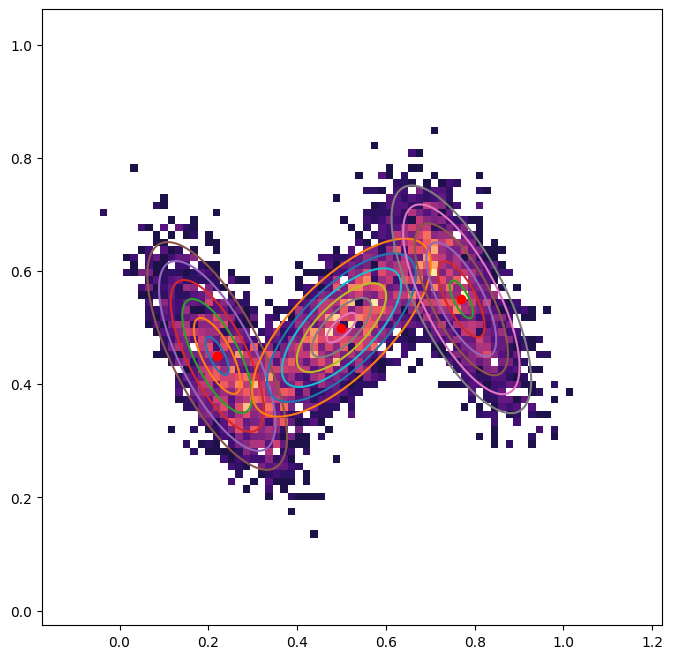

In [23]:
# sample data
import seaborn as sns

N = 10000
results = [ sample_mm( Mu, Sigma, Weight ) for _ in range(N) ]
results = np.hstack(results)

plt.figure(figsize=(8,8))
sns.histplot(x=results[0], y=results[1], bins=75, pthresh=0.1, cmap='magma')



for i in range( len(Mu) ):
    plot_sigma_levels(Mu[i], Sigma[i])
#
# create a visualization of the data generated.  (perhaps something like sns.histplot?) Compare it to the level set plots in the previous cell. Do they match?
#

---
## Exercise #2: Marginals
One way to sample from a marginal distribution is to sample from a joint distribution, and throw away the variables that have been marginalized out.  We're going to compare empirical and exact distributions.

You should perform the following:

* Sample from a multivariate Gaussian p(x,y) with the given parameters
* For each sample, throw away the second number (the "y" coordinate)
* Plot the resulting distribution of datapoints

Then, use the equations in the book to calculate the exact density of the marginal distribution over the first dimension (the "x" variable)


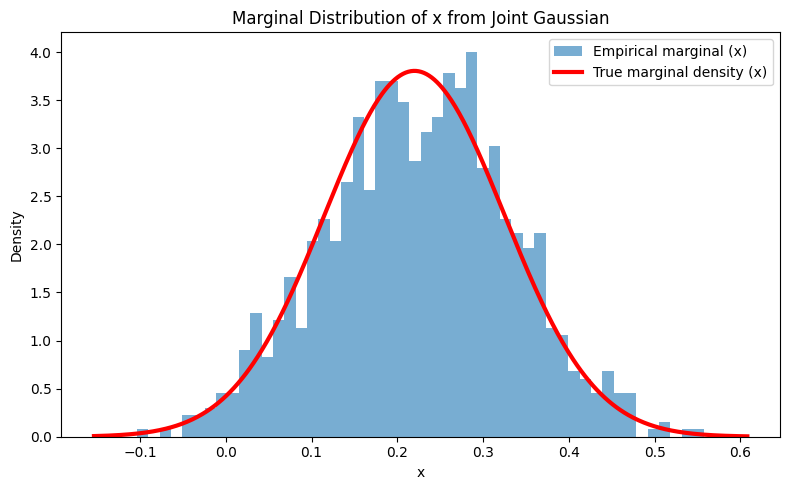

In [30]:
from scipy.stats import norm
# Use these parameters
mu = np.array([[0.22], [0.45]])
sigma = np.array([[0.011, -0.01], [-0.01, 0.018]])

# YOUR CODE HERE
samples= [sample_mm([mu], [sigma], [1.0])[0,0]for _ in range(1000)]
samples = np.array(samples)

mu_x = mu[0, 0]
sigma_x = sigma[0, 0]

x_grid = np.linspace(samples.min() - 0.05, samples.max() + 0.05, 500)
true_density = norm.pdf(x_grid, loc=mu_x, scale=np.sqrt(sigma_x))

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Empirical marginal (x)')
plt.plot(x_grid, true_density, 'r-', lw=3, label='True marginal density (x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Marginal Distribution of x from Joint Gaussian')
plt.tight_layout()
plt.show()
# Sample
# Plot the empirical distribution of points (using, for example, a histogram plotting function)
# Plot the true density curve

Now, calculate the density of several points:

* Calculate p(y=0.39)
* Calculate p(y=0.2)

In [33]:
# YOUR CODE HERE
p_y_039 = norm.pdf(0.39, loc=mu[1, 0], scale=np.sqrt(sigma[1, 1]))
p_y_02  = norm.pdf(0.2, loc=mu[1, 0], scale=np.sqrt(sigma[1, 1]))
print("p(y = 0.39):", p_y_039)
print("p(y = 0.2):", p_y_02)

p(y = 0.39): 2.69057043119227
p(y = 0.2): 0.5239505948346891


---
## Exercise #3: Conditionals
Now, let's explore the difference between marginals and conditionals.

Use the following joint distribution over 4 variables:

In [34]:
import seaborn as sns

df = sns.load_dataset("penguins")

data = np.array( df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
data = data[~np.isnan(data).any(axis=1)] # drop any row with a NaN
data[:,2] /= 200 # scale some stuff
data[:,3] /= 3000

mu = np.mean( data, axis=0 )
sigma = np.cov( data.T )

In [35]:
print(mu)
print(sigma)

[43.92192982 17.15116959  1.00457602  1.4005848 ]
[[ 2.98070543e+01 -2.53423394e+00  2.51878826e-01  8.68530637e-01]
 [-2.53423394e+00  3.89980801e+00 -8.10647519e-02 -2.49123364e-01]
 [ 2.51878826e-01 -8.10647519e-02  4.94329479e-03  1.63740268e-02]
 [ 8.68530637e-01 -2.49123364e-01  1.63740268e-02  7.14590086e-02]]


We'll assume that we have a multivariate normal distribution over 4 variables: p(x1,x2,x3,x4) = N( mu, sigma )

Now, we want to compute the mean of various conditionals

In [41]:
# Compute the parameters of p(x2,x3)  (a marginal)

marg_mu_x2_x3 = np.array([[mu[2]], [mu[3]]])
marg_sigma_x2_x3 = np.array([[sigma[2, 2], sigma[2, 3]], [sigma[3, 2], sigma[3, 3]]])
print( marg_mu_x2_x3 )
print( marg_sigma_x2_x3 )

[[1.00457602]
 [1.4005848 ]]
[[0.00494329 0.01637403]
 [0.01637403 0.07145901]]


In [55]:
# Compute the parameters or p(x2,x3|x1=34,x4=1.2)
x1_val = 34
x4_val = 1.2
x_val = np.array([x1_val, x4_val])
mu_x = mu[[0, 3]]
mu_y = mu[[2, 3]]
sigma_xx = sigma[np.ix_([0, 3], [0, 3])]       # (2,2)
sigma_yy = sigma[np.ix_([2, 3], [2, 3])]       # (2,2)
sigma_yx = sigma[np.ix_([2, 3], [0, 3])]       # (2,2)
sigma_xy = sigma[np.ix_([0, 3], [2, 3])]

cond_mu_x2_x3 = mu_y + sigma_yx @ np.linalg.inv(sigma_xx) @ (x_val - mu_x)
cond_sigma_x2_x3 = sigma_yy - sigma_yx @ np.linalg.inv(sigma_xx) @ sigma_xy
print( cond_mu_x2_x3 )
print( cond_sigma_x2_x3 )





[0.93806238 1.2       ]
[[1.04619779e-03 3.46944695e-18]
 [0.00000000e+00 0.00000000e+00]]


In [78]:
# Finally, calculate the density of a specific point:
from scipy.stats import multivariate_normal
# calculate p(x2=16, x3=0.99)
print()

# calculate p(x2=16, x3=0.99 | x1=34,x4=1.2)
print()
print("Marginal covariance determinant:", np.linalg.det(marg_sigma_x2_x3))
print("Conditional covariance determinant:", np.linalg.det(cond_sigma_x2_x3))
print("Marginal covariance matrix:", marg_sigma_x2_x3)
print("Conditional covariance matrix:", cond_sigma_x2_x3)
point = np.array([16, 0.99])
p_marginal = multivariate_normal.pdf(point, mean=marg_mu_x2_x3.flatten(), cov=marg_sigma_x2_x3, allow_singular=True)
p_conditional = multivariate_normal.pdf(point, mean=cond_mu_x2_x3.flatten(), cov=cond_sigma_x2_x3, allow_singular=True)
print("p(x2=16, x3=0.99) =", p_marginal)
print("p(x2=16, x3=0.99 | x1=34, x4=1.2) =", p_conditional)




Marginal covariance determinant: 8.513419219825426e-05
Conditional covariance determinant: 0.0
Marginal covariance matrix: [[0.00494329 0.01637403]
 [0.01637403 0.07145901]]
Conditional covariance matrix: [[1.04619779e-03 3.46944695e-18]
 [0.00000000e+00 0.00000000e+00]]
p(x2=16, x3=0.99) = 0.0
p(x2=16, x3=0.99 | x1=34, x4=1.2) = 0.0
